In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('fivethirtyeight')
%matplotlib inline 


In [23]:
# Load Apple Mobility data & create DataFrame of all data mobility_clean
mobility_file = 'applemobilitytrends-2020-05-05.csv'
mobility_df = pd.read_csv(mobility_file)
mobility_df = mobility_df.drop('alternative_name', axis=1)
mobility_df.set_index(['geo_type','region', 'transportation_type'], inplace=True)
mobility_clean = mobility_df.T
mobility_clean.set_index = pd.to_datetime(mobility_clean.index)

# create regional dataframes for countries, sub-regions, and cities
df = pd.read_csv(mobility_file)
levels = ['country/region', 'sub-region', 'city']

region_dfs = []
for i in levels:
  i = df.loc[df['geo_type']==i].drop(['geo_type', 'alternative_name'], axis=1)
  i = i.set_index(['region', 'transportation_type']).T
  i.index = pd.to_datetime(i.index)
  region_dfs.append(i)

countries, sub_regions, cities = region_dfs

# import list of states and use it to create a dataframe consisting of the 50 states
states_df = pd.read_csv('states.csv', header=None)
state_col = states_df[0]
state_list = state_col.to_list()
states = pd.DataFrame()

for i in state_list:
  states = states.append(df.loc[df['region']== i]).drop(['geo_type', 'alternative_name'], axis=1)
  

states = states.set_index(['region', 'transportation_type']).T
states.index = pd.to_datetime(states.index)

# open table data 
open_table_file = 'state_of_industry_data_5_7_2020.csv'
df2 = pd.read_csv(open_table_file, index_col=None).drop('Type', axis=1)
df2 = df2.set_index(['Name']).T
df2.index = pd.to_datetime(df2.index, infer_datetime_format=True, errors='coerce')

largest_cities = pd.read_excel('50 largest US cities.xlsx')
city_list = largest_cities.City.to_list()
city_list[0] = 'New York City'

US_cities = pd.DataFrame()

for i in city_list:
  US_cities = US_cities.append(df.loc[df['region']== i]).drop(['geo_type', 'alternative_name'], axis=1)

US_cities = US_cities.set_index(['region', 'transportation_type']).T
US_cities.index = pd.to_datetime(US_cities.index)

ten_largest_cities = city_list[0:10]

top_10_US = pd.DataFrame()

for i in ten_largest_cities:
  top_10_US = top_10_US.append(df.loc[df['region']==i]).drop(['geo_type', 'alternative_name'], axis=1)

top_10_US = top_10_US.set_index(['region', 'transportation_type']).T
top_10_US.index = pd.to_datetime(top_10_US.index)


# Exploring the Apple Maps Mobility Data
Looking at trends in the United States: there was a clear drop off in all three transportation types in early March. Since then driving and walking maps requests have returned to 20% lower and ~34% lower than the pre-Covid baseline. There has been little recovery in public transportation maps requests. 

Source for raw data: https://www.apple.com/covid19/mobility


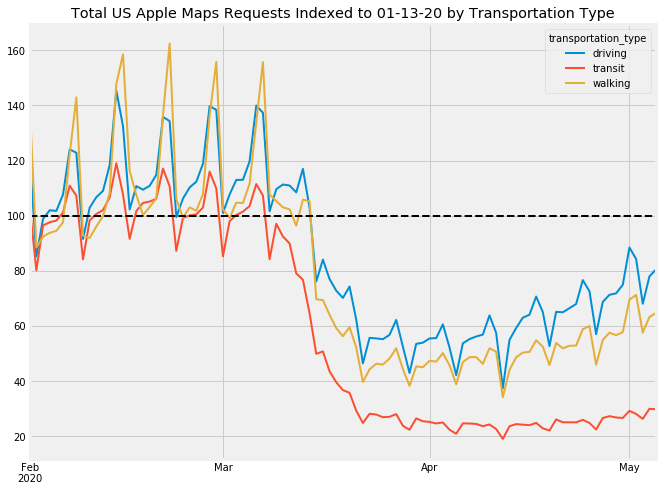

In [31]:
ax_ = countries.loc['2020-02-01': ,'United States'].plot(lw=2, figsize=(10,8), title='Total US Apple Maps Requests Indexed to 01-13-20 by Transportation Type')
ax_ = plt.axhline(100, lw=2, ls='--', c='black')

# Resampling the weekly mean driving data and week over week changes 
There is a share decleration around the date Covid was declared a national emergency 

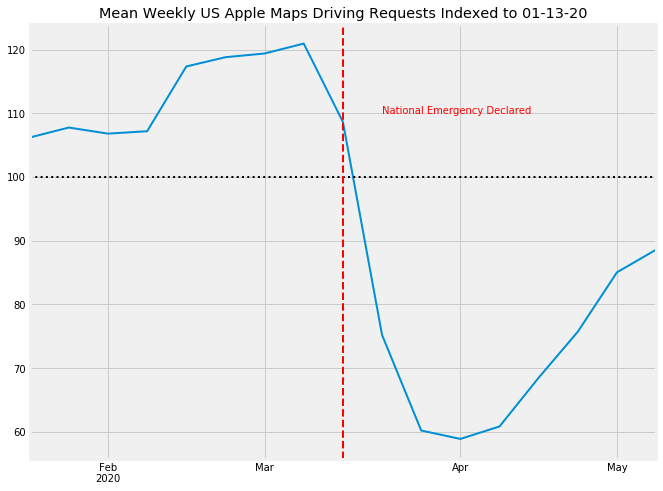

In [210]:
states['US Mean'] = states.mean(axis=1)
ax1 = states['US Mean'].resample('W').mean().plot(linewidth=2, figsize=(10,8))
ax1 = plt.title('Mean Weekly US Apple Maps Driving Requests Indexed to 01-13-20')
ax1 = plt.axhline(100, ls=':', lw=2, c='black')
ax1 = plt.axvline('2020-03-13', c='red', lw=2, ls='--')
ax1 = plt.annotate("National Emergency Declared", ('2020-03-16', 110), c='red')

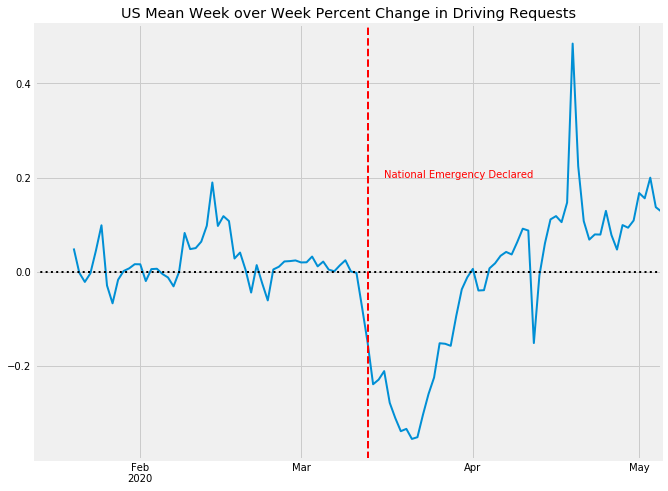

In [214]:
_ = states.pct_change(7).mean(axis=1).plot(figsize=(10,8), lw=2, title='US Mean Week over Week Percent Change in Driving Requests')
_ = plt.axhline(0, ls=':', lw=2, c='black')
_ = plt.axvline('2020-03-13', c='red', lw=2, ls='--')
_ = plt.annotate("National Emergency Declared", ('2020-03-16', .2), c='red')

# Looking closer at the 10 largest cities in the US

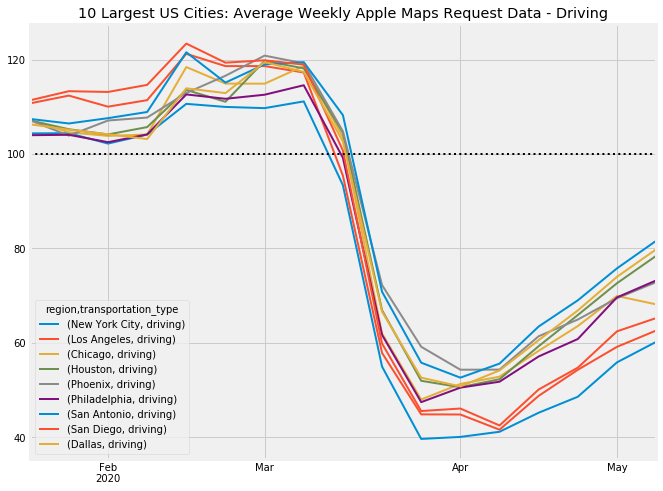

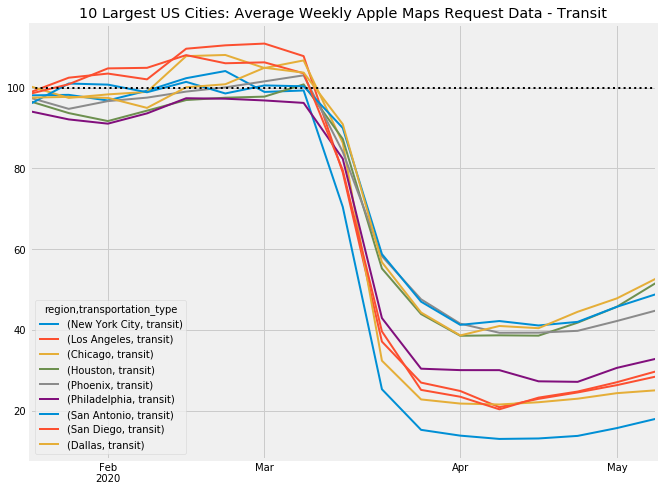

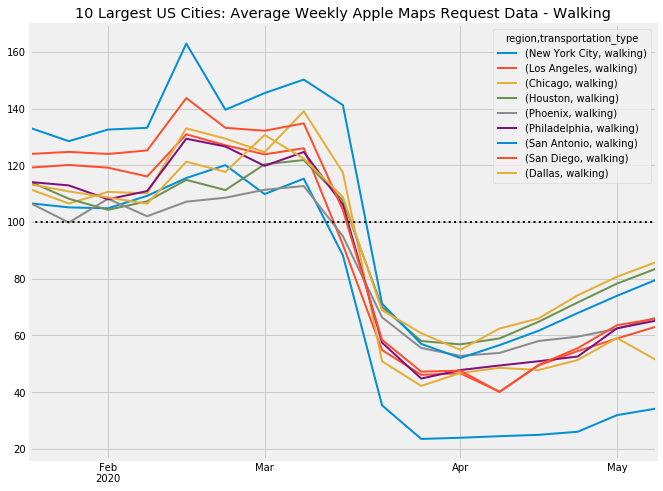

In [226]:
top_10_US.loc[:, ('New York City', 'driving')]
top_10_driving = top_10_US.loc[:, (slice(None), 'driving')]
top_10_transit =  top_10_US.loc[:, (slice(None), 'transit')]
top_10_walking =  top_10_US.loc[:, (slice(None), 'walking')]

_ = top_10_driving.resample('W').mean().plot(lw=2, figsize=(10,8), title='10 Largest US Cities: Average Weekly Apple Maps Request Data - Driving')
_ = plt.axhline(100, ls=':', lw=2, c='black')
_ = top_10_transit.resample('W').mean().plot(lw=2, figsize=(10,8), title='10 Largest US Cities: Average Weekly Apple Maps Request Data - Transit')
_ = plt.axhline(100, ls=':', lw=2, c='black')
_ = top_10_walking.resample('W').mean().plot(lw=2, figsize=(10,8), title='10 Largest US Cities: Average Weekly Apple Maps Request Data - Walking')
_ = plt.axhline(100, ls=':', lw=2, c='black')


## Number of states with weekly average above the pre-Covid baseline

Number of States with Weekly Apple Maps Driving Requests above pre-Covid level: 13



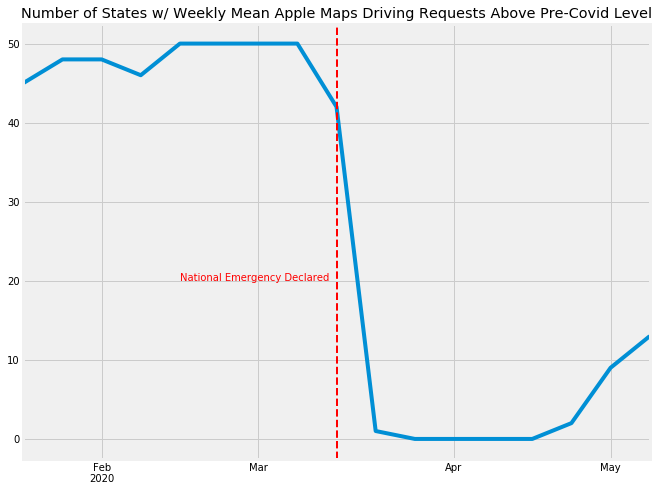

In [224]:
greater_than_100 = states.resample('W').mean().apply(lambda x: x > 100).drop('US Mean', axis=1)
greater_than_100['States Above 01-13-20 Level'] = greater_than_100.apply(np.count_nonzero, axis=1)
_ = greater_than_100['States Above 01-13-20 Level'].plot(figsize=(10,8), title='Number of States w/ Weekly Mean Apple Maps Driving Requests Above Pre-Covid Level')
_ = plt.axvline('2020-03-13', c='red', lw=2, ls='--')
_ = plt.annotate("National Emergency Declared", ('2020-02-10', 20), c='red')
print('Number of States with Weekly Apple Maps Driving Requests above pre-Covid level: ' + str(np.count_nonzero(greater_than_100['States Above 01-13-20 Level']))+ '\n')

## Number of countries in the Apple Mobility Dataset with weekly average above their pre-Covid baseline

Number of Countries with Apple Maps Driving Requests above pre-Covid level on 2020-05-05: 3



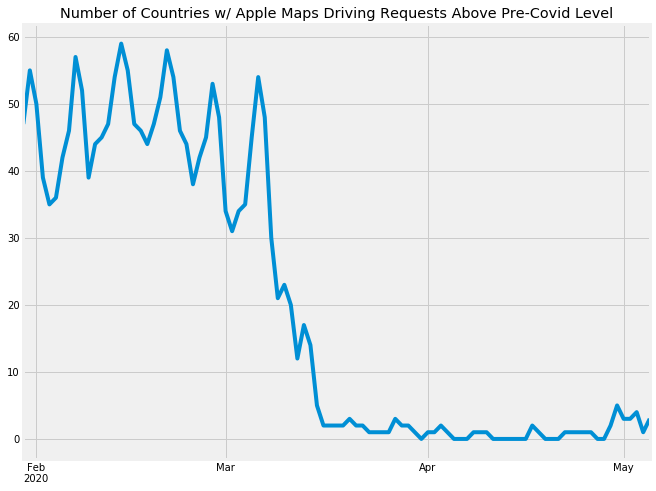

In [225]:
countries_greater_than_100 = countries.apply(lambda x: x > 100)
countries_driving = countries_greater_than_100.loc[:, (slice(None), 'driving')]
countries_transit = countries_greater_than_100.loc[:, (slice(None), 'transit')]
today = '2020-05-05'

np.count_nonzero(countries_driving.loc[today])
_ = countries_driving.apply(np.count_nonzero, axis=1).loc['2020-01-30':,].plot(figsize=(10,8), title='Number of Countries w/ Apple Maps Driving Requests Above Pre-Covid Level')
print('Number of Countries with Apple Maps Driving Requests above pre-Covid level on ' + today + ': ' + str(np.count_nonzero(countries_driving.loc['2020-05-05']))+ '\n')


# Breakdown by percentage change from pre-covid baseline over the last 2 weeks 

May 5, 2020 - Number of States with Weekly Apple Maps Driving Requests above pre-Covid level: 14



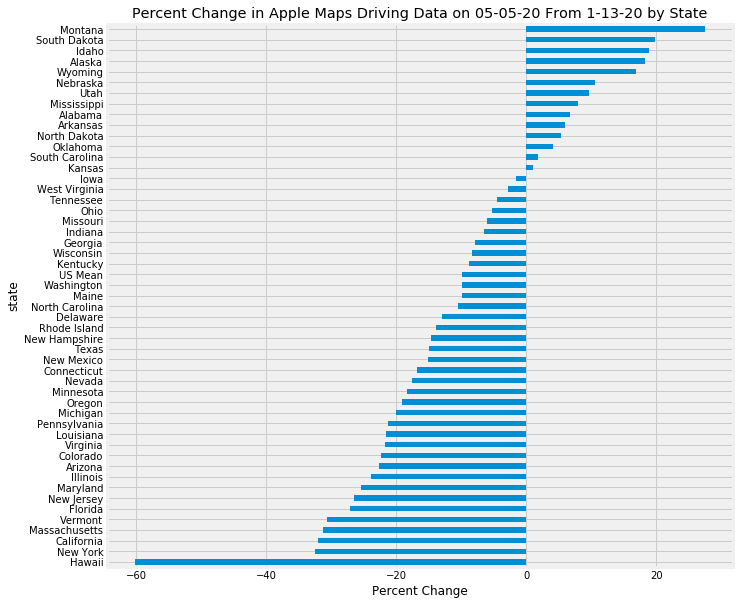

In [233]:
may_5_2020 = pd.DataFrame(states.loc['2020-05-05',:]).reset_index().drop('transportation_type', axis=1)
may_5_2020.columns = ['state', '2020-05-05 Driving']
may_5_2020 = may_5_2020.set_index('state')
may_5_2020['pct chng from 1-13-20'] = (may_5_2020.loc[:,'2020-05-05 Driving'] / 100 - 1) *100

print('May 5, 2020 - Number of States with Weekly Apple Maps Driving Requests above pre-Covid level: ' + str(np.count_nonzero(may_5_2020['pct chng from 1-13-20'] > 0))+'\n')
ax = may_5_2020['pct chng from 1-13-20'].sort_values().plot(kind='barh', figsize=(10,10) )
ax = plt.title('Percent Change in Apple Maps Driving Data on 05-05-20 From 1-13-20 by State')
ax = plt.xlabel('Percent Change')
ax = plt.show()


April 30, 2020 - Number of States with Weekly Apple Maps Driving Requests above pre-Covid level: 13



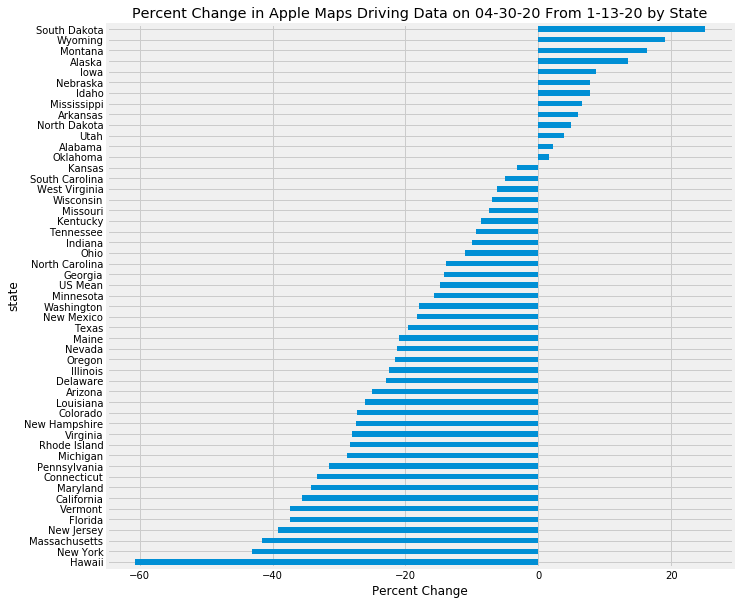

In [232]:
apr_30_2020 = pd.DataFrame(states.loc['2020-04-30',:]).reset_index().drop('transportation_type', axis=1)
apr_30_2020.columns = ['state', '2020-04-30 Driving']
apr_30_2020 = apr_30_2020.set_index('state')
apr_30_2020['pct chng from 1-13-20'] = (apr_30_2020.loc[:,'2020-04-30 Driving'] / 100 - 1) *100

print('April 30, 2020 - Number of States with Weekly Apple Maps Driving Requests above pre-Covid level: ' + str(np.count_nonzero(apr_30_2020['pct chng from 1-13-20'] > 0))+'\n')

ax = apr_30_2020['pct chng from 1-13-20'].sort_values().plot(kind='barh', figsize=(10,10) )
ax = plt.title('Percent Change in Apple Maps Driving Data on 04-30-20 From 1-13-20 by State')
ax = plt.xlabel('Percent Change')
ax = plt.show()


April 23, 2020 - Number of States with Weekly Apple Maps Driving Requests above pre-Covid level: 2


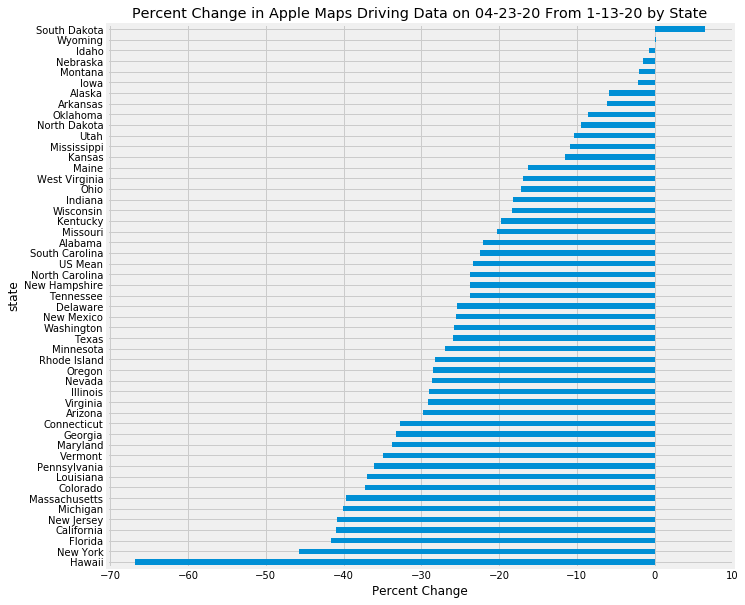

In [231]:
apr_23_2020 = pd.DataFrame(states.loc['2020-04-23',:]).reset_index().drop('transportation_type', axis=1)
apr_23_2020.columns = ['state', '2020-04-23 Driving']
apr_23_2020 = apr_23_2020.set_index('state')
apr_23_2020['pct chng from 1-13-20'] = (apr_23_2020.loc[:,'2020-04-23 Driving'] / 100 - 1) *100

print('April 23, 2020 - Number of States with Weekly Apple Maps Driving Requests above pre-Covid level: ' + str(np.count_nonzero(apr_23_2020['pct chng from 1-13-20'] > 0)))
ax = apr_23_2020['pct chng from 1-13-20'].sort_values().plot(kind='barh', figsize=(10,10) )
ax = plt.title('Percent Change in Apple Maps Driving Data on 04-23-20 From 1-13-20 by State')
ax = plt.xlabel('Percent Change')
ax = plt.show()


# Adding the Open Table State of the Industry Data
The open table data shows the YoY change in restaurant traffic in their network

Source for data: https://www.opentable.com/state-of-industry

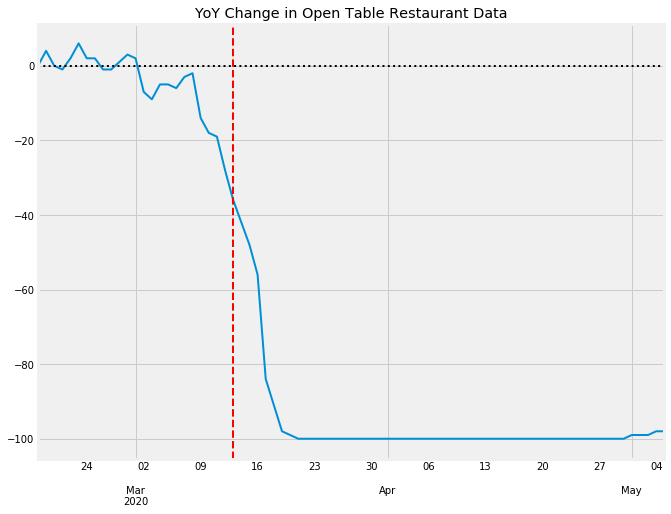

In [144]:
# Adding open table data to the mix
_ = df2['United States'].plot(lw=2, figsize=(10,8), title='YoY Change in Open Table Restaurant Data')
_ = plt.axhline(0, ls=':', lw=2, c='black')
_ = plt.axvline('2020-03-13', c='red', lw=2, ls='--')

# Combining the Apple Maps and Open Table Data for States

## Michigan

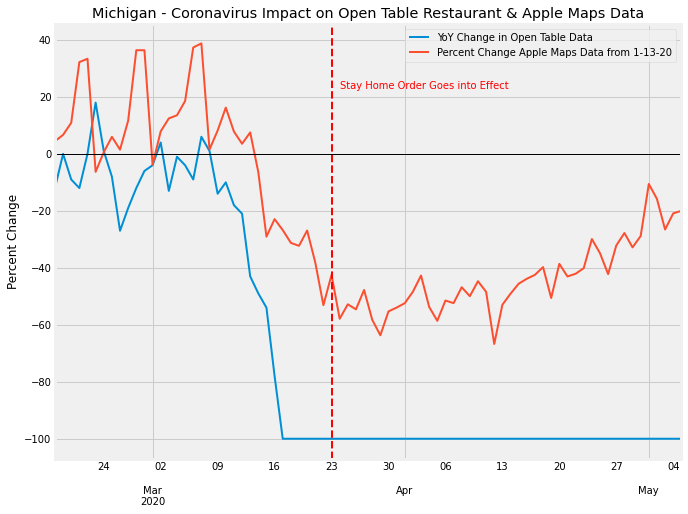

In [120]:
michigan = pd.DataFrame(df2.Michigan).join(states.Michigan)
michigan['Pct change driving'] = (michigan.driving/100 -1) *100
michigan = michigan.drop('driving', axis=1)
michigan.columns = ['YoY Change in Open Table Data', 'Percent Change Apple Maps Data from 1-13-20']
michigan
_ = michigan.plot(lw=2, figsize=(10,8))
_ = plt.axvline('2020-03-23', c='red', lw=2, ls='--')
_ = plt.axhline(0, c='black', lw=1)
_ = plt.annotate('Stay Home Order Goes into Effect', ('2020-03-24', 23), c='red')
_ = plt.title('Michigan - Coronavirus Impact on Open Table Restaurant & Apple Maps Data')
_ = plt.ylabel('Percent Change')

## New York

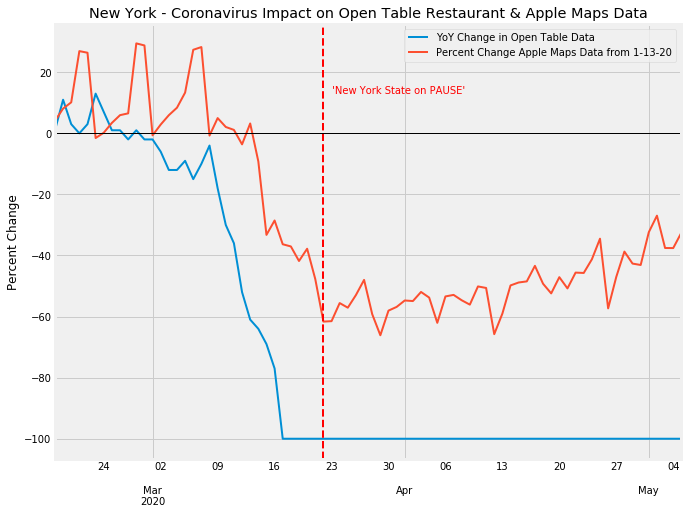

In [109]:
new_york = pd.DataFrame(df2['New York'].iloc[:,1]).join(states['New York'])
new_york['Pct change driving'] = (new_york.driving/100 -1) *100
new_york = new_york.drop('driving', axis=1)
new_york.columns = ['YoY Change in Open Table Data', 'Percent Change Apple Maps Data from 1-13-20']
new_york

_ = new_york.plot(lw=2, figsize=(10,8))
_ = plt.axvline('2020-03-22', c='red', lw=2, ls='--')
_ = plt.axhline(0, c='black', lw=1)
_ = plt.annotate("'New York State on PAUSE'", ('2020-03-23', 13), c='red')
_ = plt.title('New York - Coronavirus Impact on Open Table Restaurant & Apple Maps Data')
_ = plt.ylabel('Percent Change')